___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data
https://fred.stlouisfed.org/series/S4248SM144NCEN

In [2]:
df = pd.read_csv('../Data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
df.columns = ['Sales']

<Axes: xlabel='DATE'>

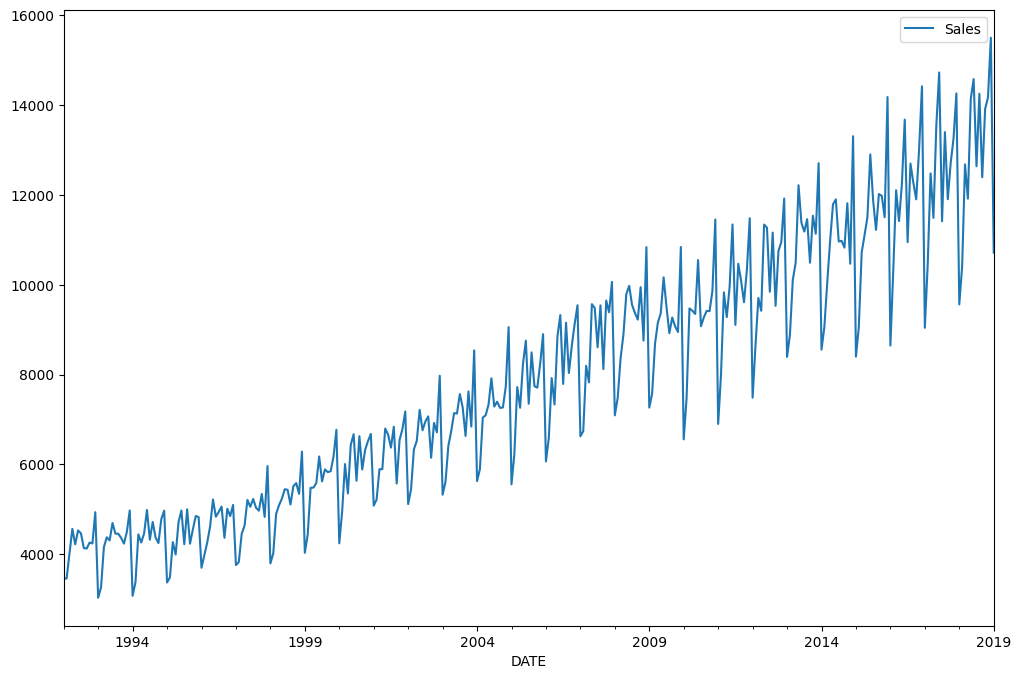

In [5]:
df.plot(figsize=(12,8))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Axes: xlabel='DATE'>

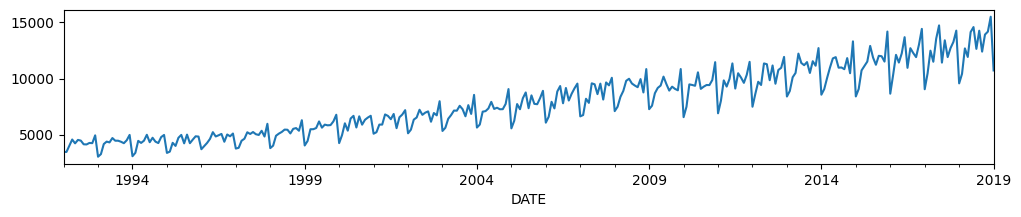

In [8]:
results = seasonal_decompose(df['Sales'])
results.observed.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

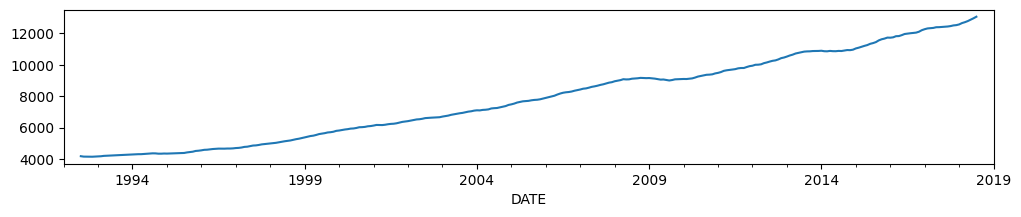

In [9]:
results.trend.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

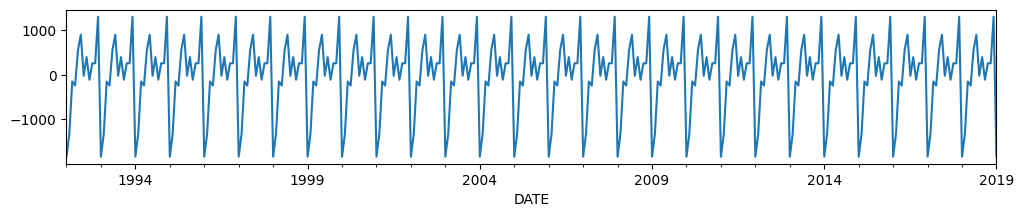

In [10]:
results.seasonal.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

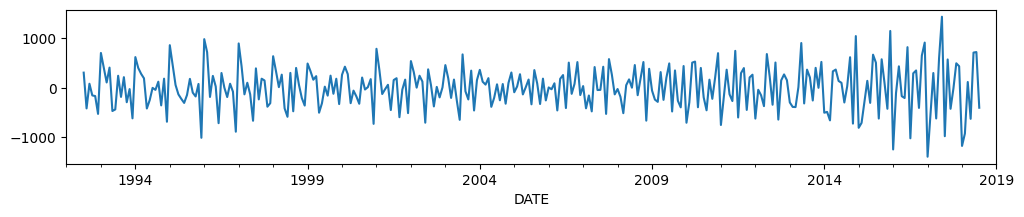

In [11]:
results.resid.plot(figsize=(12,2))

## Train Test Split

In [12]:
len(df)

325

In [13]:
325-12

313

In [14]:
train = df.iloc[:313]
test = df.iloc[313:]

In [15]:
len(test)

12

## Scale Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train) # find the max value in the train data

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [22]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [24]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

scaled_train = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] (i.e., len(scaled_train) = 10)

n_input = 3 (this is the length of the input sequence for each sample)

First sample:
Input: [1, 2, 3], Output: 4

Second sample:
Input: [2, 3, 4], Output: 5

Third sample:
Input: [3, 4, 5], Output: 6

Fourth sample:
Input: [4, 5, 6], Output: 7

Fifth sample:
Input: [5, 6, 7], Output: 8

Sixth sample:
Input: [6, 7, 8], Output: 9

Seventh sample:
Input: [7, 8, 9], Output: 10

the batch_size parameter determines how many samples are returned by the generator at a time

scaled_train = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] (i.e., len(scaled_train) = 10)

n_input = 3 (length of the input sequence for each sample)

batch_size = 2

First batch: Returns two samples:

Input: [1, 2, 3], Output: 4

Input: [2, 3, 4], Output: 5

So the first batch will be: [4, 5]

Second batch: Returns the next two samples:

Input: [3, 4, 5], Output: 6

Input: [4, 5, 6], Output: 7

The second batch will be: [6, 7]

And so on, until all samples have been returned. The generator continues returning batches until the data is exhausted.

In [25]:
len(scaled_train)

313

In [26]:
len(generator) # n_input = 2

311

In [27]:
# What does the first batch look like?
X,y = generator[0]

In [28]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885]
Predict this y: 
 [[0.08299855]]


In [29]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [30]:
# What does the first batch look like?
X,y = generator[0]

In [75]:
X.shape

(1, 12, 1)

In [33]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


### Create the Model

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [69]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/Users/yingliu/Desktop/self-dev/time-series/notebooks/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# fit model
model.fit(generator, epochs=50)

Epoch 1/50
 96/301 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1639  

/Users/yingliu/Desktop/self-dev/time-series/notebooks/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0785
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0095
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0099
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0083
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0074
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048
Epoch 7/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050
Epoch 8/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0040
Epoch 9/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0038
Epoch 10/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035
Epoch 11/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025
Epoch 12/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024
Epoch 13/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 14/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023
Epoch 15/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017


In [38]:
model.history.history.keys()

dict_keys(['loss'])

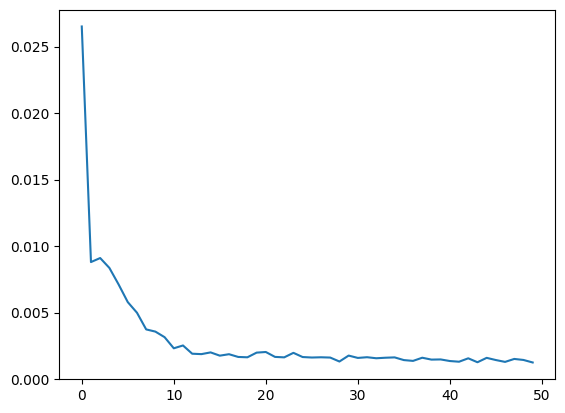

In [39]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

In [40]:
first_eval_batch = scaled_train[-12:]

In [41]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [42]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [43]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[0.6504875]], dtype=float32)

In [44]:
scaled_test[0]

array([0.63116506])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [45]:
# holding my predictions
test_predictions = []

#last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [46]:
current_batch.shape

(1, 12, 1)

In [47]:
current_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [55]:
current_batch[:,1:,:]

array([[[0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [48]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80776135],
        [ 0.72313873],
        [ 0.89870929],
        [ 1.        ],
        [ 0.71672793],
        [ 0.88648602],
        [ 0.75869732],
        [ 0.82742115],
        [ 0.87443371],
        [ 0.96025301],
        [ 0.5584238 ],
        [99.        ]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [52]:
model.predict(current_batch)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([0.6504875], dtype=float32)

In [56]:
current_batch.shape

(1, 12, 1)

In [57]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) 
    #axis means the location of the shape, we have three locations: 0,1,2 in this case. We want to replace the middle shape so it is 1.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [58]:
test_predictions

[array([0.6504875], dtype=float32),
 array([0.7728537], dtype=float32),
 array([0.72559965], dtype=float32),
 array([0.89340013], dtype=float32),
 array([0.961381], dtype=float32),
 array([0.70812243], dtype=float32),
 array([0.8651824], dtype=float32),
 array([0.7297376], dtype=float32),
 array([0.8136928], dtype=float32),
 array([0.8536402], dtype=float32),
 array([0.9286028], dtype=float32),
 array([0.53916824], dtype=float32)]

In [59]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

## Inverse Transformations and Compare

In [60]:
true_predictions = scaler.inverse_transform(test_predictions)

In [61]:
true_predictions

array([[10641.05305833],
       [12072.61511463],
       [11519.7902652 ],
       [13482.88815194],
       [14278.19653147],
       [11315.32433468],
       [13152.76889467],
       [11568.19994634],
       [12550.39216256],
       [13017.73668468],
       [13894.72432888],
       [ 9338.72922385]])

In [62]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [63]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

/var/folders/pf/0w_5tqzd3fq9q1cjhm4hs7k40000gn/T/ipykernel_78880/1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [64]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,10641.053058
2018-03-01,12683,12072.615115
2018-04-01,11919,11519.790265
2018-05-01,14138,13482.888152
2018-06-01,14583,14278.196531
2018-07-01,12640,11315.324335
2018-08-01,14257,13152.768895
2018-09-01,12396,11568.199946
2018-10-01,13914,12550.392163


<Axes: xlabel='DATE'>

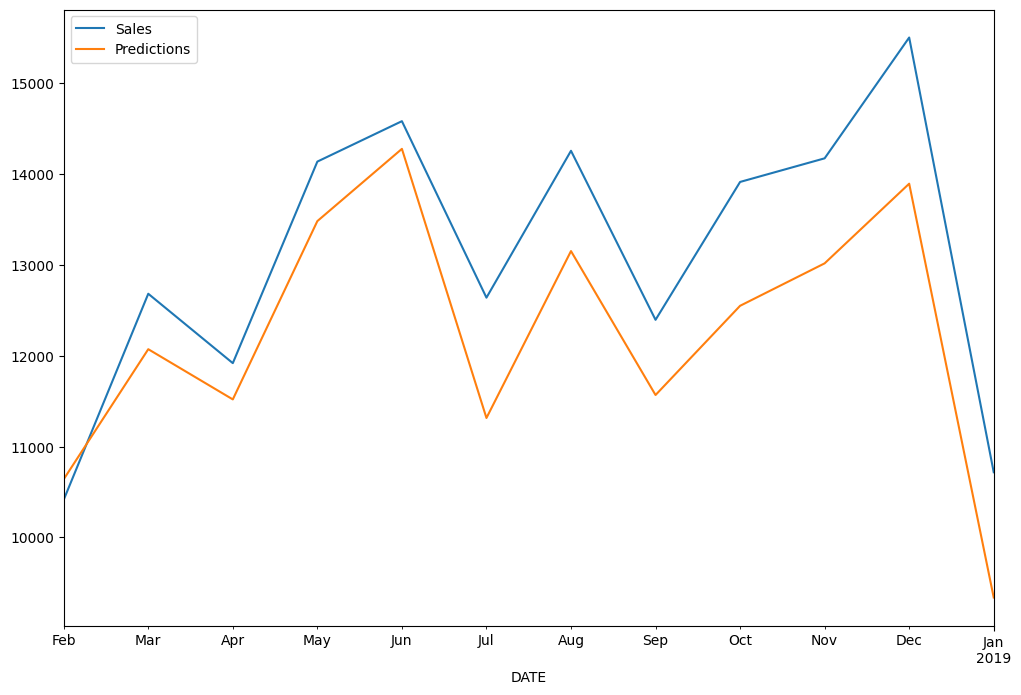

In [65]:
test.plot(figsize=(12,8))

# Saving and Loading Models

In [71]:
model.save('my_rnn_model.h5')

## load a model

In [72]:
from tensorflow.keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [73]:
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,903 (159.78 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)